In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Reddit").getOrCreate()

#spark = SparkSession.builder.appName("HackerNews").getOrCreate()

df = None
df = spark.read.csv("s3a://andrew-bierbaum-insight-test-dataset/Reddit/Reddit_Comments_2006*.csv.gz", header=True,multiLine=True, escape='"')

print(df.show(10))

+--------------------+------------+--------+----+---------------+-----------------+-----+-----------+------------+-------+---------+-----+------------+----------------+------+-----+----------+---+-------------+----------------------+
|                body|score_hidden|archived|name|         author|author_flair_text|downs|created_utc|subreddit_id|link_id|parent_id|score|retrieved_on|controversiality|gilded|   id| subreddit|ups|distinguished|author_flair_css_class|
+--------------------+------------+--------+----+---------------+-----------------+-----+-----------+------------+-------+---------+-----+------------+----------------+------+-----+----------+---+-------------+----------------------+
|Guess this kinda ...|        null|    null|null|        dbenhur|             null| null| 1152221185|        t5_6|  t3_87|    t3_87|   35|  1473826345|               0|     0|c9gm2|reddit.com| 35|         null|                  null|
|           [deleted]|        null|    null|null|      [deleted]

In [2]:
df.createOrReplaceTempView("Reddit")
#time >1000000000 just filters out 6 bad entries --double chedk this is a good way to do it
results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body LIKE '% python %'")
#results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body LIKE '% python %'  SORT BY created_utc ASC")
#AND time >1000000000
results.show()

+-----------+--------------------+
|created_utc|                body|
+-----------+--------------------+
| 1139381304|Maybe. But python...|
| 1139397565|I don't think pyt...|
| 1139385681|Lisp macros aren'...|
| 1139411795|Unfortunately, la...|
| 1139846677|This article just...|
| 1139803996|Why should I choo...|
| 1139870381|and for those tha...|
| 1140133049|Cellphones are co...|
| 1141074379|Why would you wan...|
| 1141002031|Well Only Ruby pe...|
| 1141007849|a *lot*. i use li...|
| 1141008255|i haven't used ru...|
| 1141067291|I've never worked...|
| 1141228975|yes, runtime.

...|
| 1141145221|&gt;However, I th...|
| 1141160666|Yeah, I was supri...|
| 1141531205|Good writing, the...|
| 1141531903|My only experienc...|
| 1141671925|"if you know and ...|
| 1141770875|One thing I didnt...|
+-----------+--------------------+
only showing top 20 rows



In [3]:
from datetime import datetime
python_results = results.select('created_utc').collect()
#python_results_timestamp = results.select('timestamp').collect()
python_results_plotting = [float(i[0]) for i in python_results]
clean_python_results = [datetime.fromtimestamp(float(i[0])) for i in python_results]
#print(clean_python_results_timestamp)

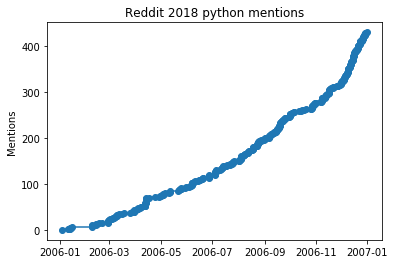

<Figure size 432x288 with 0 Axes>

In [4]:
%matplotlib inline
import numpy
import matplotlib
import matplotlib.pyplot as plt
clean_python_results.sort()
count = numpy.arange(len(clean_python_results))
#Date_Data = matplotlib.dates.datestr2num(clean_python_results_utc)
Date_Data = clean_python_results
matplotlib.pyplot.plot_date(Date_Data,count,xdate=True, drawstyle = 'steps-pre', linestyle = 'solid' )
matplotlib.pyplot.ylabel('Mentions')
matplotlib.pyplot.title('Reddit 2018 python mentions')
plt.show()
plt.savefig('Reddit.png')


In [5]:
print python_results_plotting

[1139381304.0, 1139397565.0, 1139385681.0, 1139411795.0, 1139846677.0, 1139803996.0, 1139870381.0, 1140133049.0, 1141074379.0, 1141002031.0, 1141007849.0, 1141008255.0, 1141067291.0, 1141228975.0, 1141145221.0, 1141160666.0, 1141531205.0, 1141531903.0, 1141671925.0, 1141770875.0, 1141738615.0, 1141868007.0, 1142141333.0, 1142449083.0, 1143237782.0, 1143680412.0, 1143681556.0, 1143688324.0, 1143709528.0, 1143713365.0, 1143923927.0, 1144133203.0, 1144111778.0, 1146262695.0, 1147308395.0, 1148228675.0, 1148931987.0, 1149622950.0, 1149602136.0, 1149686613.0, 1149687195.0, 1149687196.0, 1149830980.0, 1149874642.0, 1149997780.0, 1150483850.0, 1150663367.0, 1152527661.0, 1153184173.0, 1153099664.0, 1153141354.0, 1153757380.0, 1153839546.0, 1153842579.0, 1153851451.0, 1154960589.0, 1154984400.0, 1155048262.0, 1155228393.0, 1155480981.0, 1155738327.0, 1158519450.0, 1159121853.0, 1161948225.0, 1161953965.0, 1161966874.0, 1161962636.0, 1162999996.0, 1164236345.0, 1164481308.0, 1164486282.0, 11649

In [23]:
import csv
import pandas
python_results_plotting.sort()
pandas_df = pandas.DataFrame(python_results_plotting,count,columns=['timestamp'])
pandas_df.head()
pandas_df.to_csv("dash.csv")

In [9]:
# import csv
# import pandas

# pandas_df = pandas.DataFrame(python_results_timestamp, columns = ['count, timestamp'])
# pandas_df.show()

NameError: name 'python_results_timestamp' is not defined

In [16]:
# import dash
# import dash_core_components as dcc
# import dash_html_components as html

# external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# app.layout = html.Div(children=[
#     html.H1(children='Reddit 2006'),

#     html.Div(children='''
#         Dash: A web application framework for Python.
#     '''),

#     dcc.Graph(
#         id='Reddit 2006 python mentions',
#         figure={
#             'data': [
#                 {'x': Date_Data, 'y': count, 'type': 'scatter', 'name': 'SF'}
#             ],
#             'layout': {
#                 'title': 'Dash Data Visualization'
#             }
#         }
#     )
# ])

# if __name__ == '__main__':
#     app.run_server(debug=True, port = 9990, host ='0.0.0.0')

Running on http://0.0.0.0:9990/
Running on http://0.0.0.0:9990/
Running on http://0.0.0.0:9990/
Debugger PIN: 820-081-177
Debugger PIN: 820-081-177
Debugger PIN: 820-081-177
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

/home/ubuntu/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2886: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.

